In [1]:
# setup
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

## Classifying newswires: A multiclass classification problem

In this project, we’ll build a model to classify Reuters newswires into 46 mutually exclusive topics. Because we have many classes, this problem is an instance of ***multi-class classification***, and because each data point should be classified into only one category, the problem is more specifically an instance of ***single-label multiclass classification***.

In [2]:
from tensorflow.keras.datasets import reuters

```
This is a dataset of 11,228 newswires from Reuters, labeled over 46 topics.

This was originally generated by parsing and preprocessing the classic
Reuters-21578 dataset, but the preprocessing code is no longer packaged
with Keras. See this
[GitHub discussion](https://github.com/keras-team/keras/issues/12072)
for more info.

Each newswire is encoded as a list of word indexes (integers).
For convenience, words are indexed by overall frequency in the dataset,
so that for instance the integer "3" encodes the 3rd most frequent word in
the data. This allows for quick filtering operations such as:
"only consider the top 10,000 most
common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used
to encode any unknown word.
```

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

`num_words=10000` restricts the data to the 10000 most frequently occuring words found in the data.

In [4]:
train_data.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [6]:
type(train_data[0])

list

In [7]:
train_data[0][:5]

[1, 2, 2, 8, 43]

**decoding newswires back to text**

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for key,value in word_index.items()])

In [9]:
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [10]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

NOTE that the indices are offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of sequence" and "unknown"

In [11]:
train_labels[0]

3

labels are topic index from 0 to 45

### Prepare the data

In [12]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
# one-hot encoding labels
from tensorflow.keras.utils import to_categorical

In [15]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
y_train.shape

(8982, 46)

In [17]:
y_test.shape

(2246, 46)

In [18]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Building your model

In [19]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [20]:
model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

Lets set apart 1000 samples from the training data to be used as a validation set.

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [22]:
history = model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3541 - loss: 3.2024 - val_accuracy: 0.6480 - val_loss: 1.7930
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6805 - loss: 1.6069 - val_accuracy: 0.6930 - val_loss: 1.3622
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7447 - loss: 1.2064 - val_accuracy: 0.7330 - val_loss: 1.2037
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8014 - loss: 0.9588 - val_accuracy: 0.7510 - val_loss: 1.0976
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8361 - loss: 0.7998 - val_accuracy: 0.7850 - val_loss: 0.9909
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8564 - loss: 0.6651 - val_accuracy: 0.8060 - val_loss: 0.9436
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8807 - loss: 0.5595 - val_accuracy: 0.8040 - val_loss: 0.9090
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8988 - loss: 0.4828 - val_accuracy: 0.8110 - val_lo

In [23]:
loss_and_metrics = pd.DataFrame(history.history)

In [24]:
loss_and_metrics

,accuracy,loss,val_accuracy,val_loss
0,0.477449,2.698729,0.648,1.793003
1,0.690053,1.515985,0.693,1.362196
2,0.754322,1.163991,0.733,1.203688
3,0.799173,0.953581,0.751,1.097638
4,0.835004,0.790636,0.785,0.990891
5,0.855299,0.663836,0.806,0.943602
6,0.881483,0.552350,0.804,0.909045
7,0.901403,0.466170,0.811,0.878558
8,0.915936,0.394751,0.793,0.913043
9,0.927462,0.337244,0.814,0.850100


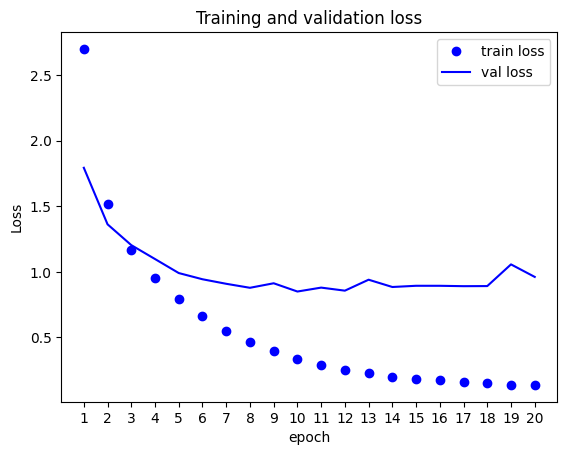

In [25]:
plt.plot(loss_and_metrics.index, loss_and_metrics.loss, "bo", label="train loss")
plt.plot(loss_and_metrics.index, loss_and_metrics.val_loss, "b-", label="val loss")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.xticks(ticks=np.arange(len(loss_and_metrics)), labels=np.arange(1, len(loss_and_metrics) + 1))
plt.legend()
plt.title('Training and validation loss')
plt.show()

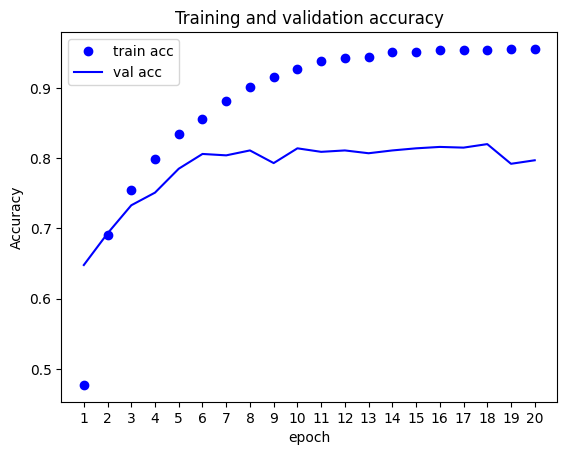

In [26]:
plt.plot(loss_and_metrics.index, loss_and_metrics.accuracy, "bo", label="train acc")
plt.plot(loss_and_metrics.index, loss_and_metrics.val_accuracy, "b-", label="val acc")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.xticks(ticks=np.arange(len(loss_and_metrics)), labels=np.arange(1, len(loss_and_metrics) + 1))
plt.legend()
plt.title('Training and validation accuracy')
plt.show()

The model begins to overfit after the 10th epoch. 

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

model.compile(optimizer="rmsprop",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=10,
          batch_size=512
         )

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4281 - loss: 3.1509
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6654 - loss: 1.6176
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7411 - loss: 1.1945
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7994 - loss: 0.9388
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8429 - loss: 0.7524
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8661 - loss: 0.6572
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8984 - loss: 0.5117
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9077 - loss: 0.4409
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9217 - loss: 0.3760
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9286 - loss: 0.3170


In [28]:
results = model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8054 - loss: 0.8953


In [29]:
results

[0.917628824710846, 0.7965271472930908]

**results of a purely random classifier:**

In [30]:
import copy

In [31]:
test_labels_copy = copy.copy(test_labels)

In [32]:
np.random.shuffle(test_labels_copy)

In [33]:
hist_array = np.array(test_labels) == np.array(test_labels_copy)

In [34]:
hist_array.mean()

0.17497773820124665

Therefore our model is doing much better than a purely random classifier.

**generating predictions on new data:**

In [35]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
predictions

array([[1.71165925e-06, 5.16631117e-05, 5.57271960e-06, ...,
        2.36926189e-06, 4.42290144e-07, 2.08285456e-07],
       [6.18383347e-04, 2.00169142e-02, 1.30294785e-02, ...,
        3.89363238e-04, 3.08209856e-05, 2.08022495e-04],
       [1.42444007e-03, 9.56164300e-01, 3.11116513e-04, ...,
        9.49373061e-05, 1.46653867e-04, 4.53327666e-04],
       ...,
       [1.87644255e-05, 1.24363141e-04, 6.48825444e-05, ...,
        1.16286865e-05, 9.36527704e-06, 1.98665407e-06],
       [5.35330363e-03, 2.67162472e-02, 5.30989189e-03, ...,
        7.22064171e-04, 9.32355761e-05, 4.96630382e-05],
       [2.39589158e-03, 3.58780086e-01, 2.24186871e-02, ...,
        8.63320951e-04, 4.07003943e-04, 9.43943043e-04]], dtype=float32)

In [37]:
predictions.shape

(2246, 46)

The coefficients in this vector sum to 1, as they form a probability distribution.

In [38]:
np.sum(predictions, axis=1)

array([0.9999999, 1.0000001, 1.       , ..., 0.9999999, 1.0000001,
       1.       ], dtype=float32)

In [39]:
np.argmax(predictions, axis=1)
# gives the predicted class per sample.

array([ 3, 10,  1, ...,  3,  4,  1], dtype=int64)